In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import json

In [2]:
# parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 100

In [3]:
# load the training data
with open('./crickets-chirp-data.json') as data_file:
    data = json.load(data_file)

train_X = numpy.asarray(data['frequency'])
train_Y = numpy.asarray(data['tempF'])

In [4]:
# graph inputs
X = tf.placeholder('float')
Y = tf.placeholder('float')

# model weights
randn = numpy.random.randn
W = tf.Variable(randn(), name='weight')
b = tf.Variable(randn(), name='bias')

In [5]:
# linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# mean squared error
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * train_X.shape[0])

\begin{equation*}
MSE = \frac{1}{n} \sum_{i=1}^n (\hat{Y_i} - Y_i)^2
\end{equation*}

In [7]:
# define gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# initialize the variables
init = tf.global_variables_initializer()

Epoch: 0100, cost=12.682089806, W=4.868919849395752, b=1.0051943063735962
Epoch: 0200, cost=12.603310585, W=4.8532586097717285, b=1.2574992179870605
Epoch: 0300, cost=12.526021004, W=4.837754726409912, b=1.5072647333145142
Epoch: 0400, cost=12.450209618, W=4.822406768798828, b=1.754520297050476
Epoch: 0500, cost=12.375866890, W=4.80721378326416, b=1.9992802143096924
Epoch: 0600, cost=12.302919388, W=4.792173385620117, b=2.2415771484375
Epoch: 0700, cost=12.231372833, W=4.777284622192383, b=2.4814364910125732
Epoch: 0800, cost=12.161204338, W=4.762546062469482, b=2.7188796997070312
Epoch: 0900, cost=12.092368126, W=4.747955799102783, b=2.953930377960205
Epoch: 1000, cost=12.024829865, W=4.7335124015808105, b=3.186615467071533
Epoch: 1100, cost=11.958556175, W=4.719213485717773, b=3.416958808898926
Epoch: 1200, cost=11.893583298, W=4.705060005187988, b=3.644981861114502
Epoch: 1300, cost=11.829843521, W=4.691048622131348, b=3.8707096576690674
Epoch: 1400, cost=11.767290115, W=4.677177906

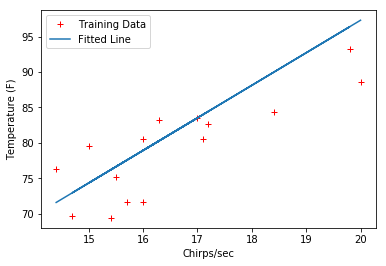

In [9]:
# launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # fit the training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            
        # show progress
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            epoch_display = '%04d' % (epoch + 1)
            cost_display = '{:.9f}'.format(c)
            weight_display = sess.run(W)
            bias_display = sess.run(b)
            print(f'Epoch: {epoch_display}, cost={cost_display}, W={weight_display}, b={bias_display}')
            
    weight_display = sess.run(W)
    bias_display = sess.run(b)
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print(f'\nTraining cost={training_cost}, W={bias_display}, b={bias_display}')
    
    # graph the fitted line
    plt.plot(train_X, train_Y, 'r+', label='Training Data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted Line')
    plt.xlabel('Chirps/sec')
    plt.ylabel('Temperature (F)')
    plt.legend()
    plt.show()